Project Title: Analysis for Rusty Bargain

Introduction:
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
#Load libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import time 

from scipy import stats as st 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split, GridSearchCV, KFold 
from sklearn.metrics import mean_squared_error, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler, MaxAbsScaler 

from sklearn.utils import shuffle 
from sklearn.pipeline import Pipeline 
from sklearn.dummy import DummyRegressor 

from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor  
from catboost import CatBoostRegressor 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
#Load dataframe 

df = pd.read_csv('/datasets/car_data.csv')


In [3]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.isna().sum()/len(df) * 100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Mileage               0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

In [6]:
df.duplicated().sum()

262

In [7]:
df[(df['RegistrationYear'] <=1900)| (df['RegistrationYear']>=2023)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
622,16/03/2016 16:55,0,NaN,1111,NaN,0,NaN,5000,0,NaN,opel,NaN,16/03/2016 00:00,0,44628,20/03/2016 16:44
12946,29/03/2016 18:39,49,NaN,5000,NaN,0,golf,5000,12,NaN,volkswagen,NaN,29/03/2016 00:00,0,74523,06/04/2016 04:16
15147,14/03/2016 00:52,0,NaN,9999,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,13/03/2016 00:00,0,32689,21/03/2016 23:46
15870,02/04/2016 11:55,1700,NaN,3200,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN,02/04/2016 00:00,0,33649,06/04/2016 09:46
16062,29/03/2016 23:42,190,NaN,1000,NaN,0,mondeo,5000,0,NaN,ford,NaN,29/03/2016 00:00,0,47166,06/04/2016 10:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340548,02/04/2016 17:44,0,NaN,3500,manual,75,NaN,5000,3,petrol,sonstige_autos,NaN,02/04/2016 00:00,0,96465,04/04/2016 15:17
340759,04/04/2016 23:55,700,NaN,1600,manual,1600,a3,150000,4,petrol,audi,no,04/04/2016 00:00,0,86343,05/04/2016 06:44
341791,28/03/2016 17:37,1,NaN,3000,NaN,0,zafira,5000,0,NaN,opel,NaN,28/03/2016 00:00,0,26624,02/04/2016 22:17
348830,22/03/2016 00:38,1,NaN,1000,NaN,1000,NaN,150000,0,NaN,sonstige_autos,NaN,21/03/2016 00:00,0,41472,05/04/2016 14:18


Description: 
Based on the initial data exploration it becomes clear that serveral isseus exist with the data:
1. Missing data in several columns which accounts for 20% of the total data.
2. Abnormal data in serveral columns.
3. Duplicated data.
4. Inappropraite data types.

Next steps, will be to remove the duplicated data, fix abnormal data, fill in missing values and correcting the inappropriate data types. 

Fixing the data 

In [8]:
#Dropping duplicated data 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
#Correcting column names 
df = df.rename(columns={'DateCrawled':'date_crawled','Price':'price', 'VehicleType': 'vehicle_type',\
                        'RegistrationYear': 'registration_year', 'Gearbox':'gearbox','Power': 'power',\
                        'Model': 'model','Mileage':'mileage', 'RegistrationMonth':'registration_month',\
                        'FuelType':'fuel_type','Brand':'brand','NotRepaired':'not_repaired', 'DateCreated':'date_created',\
                        'NumberOfPictures':'number_of_pictures','PostalCode':'postal_code', 'LastSeen':'last_seen'})
df.columns 

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

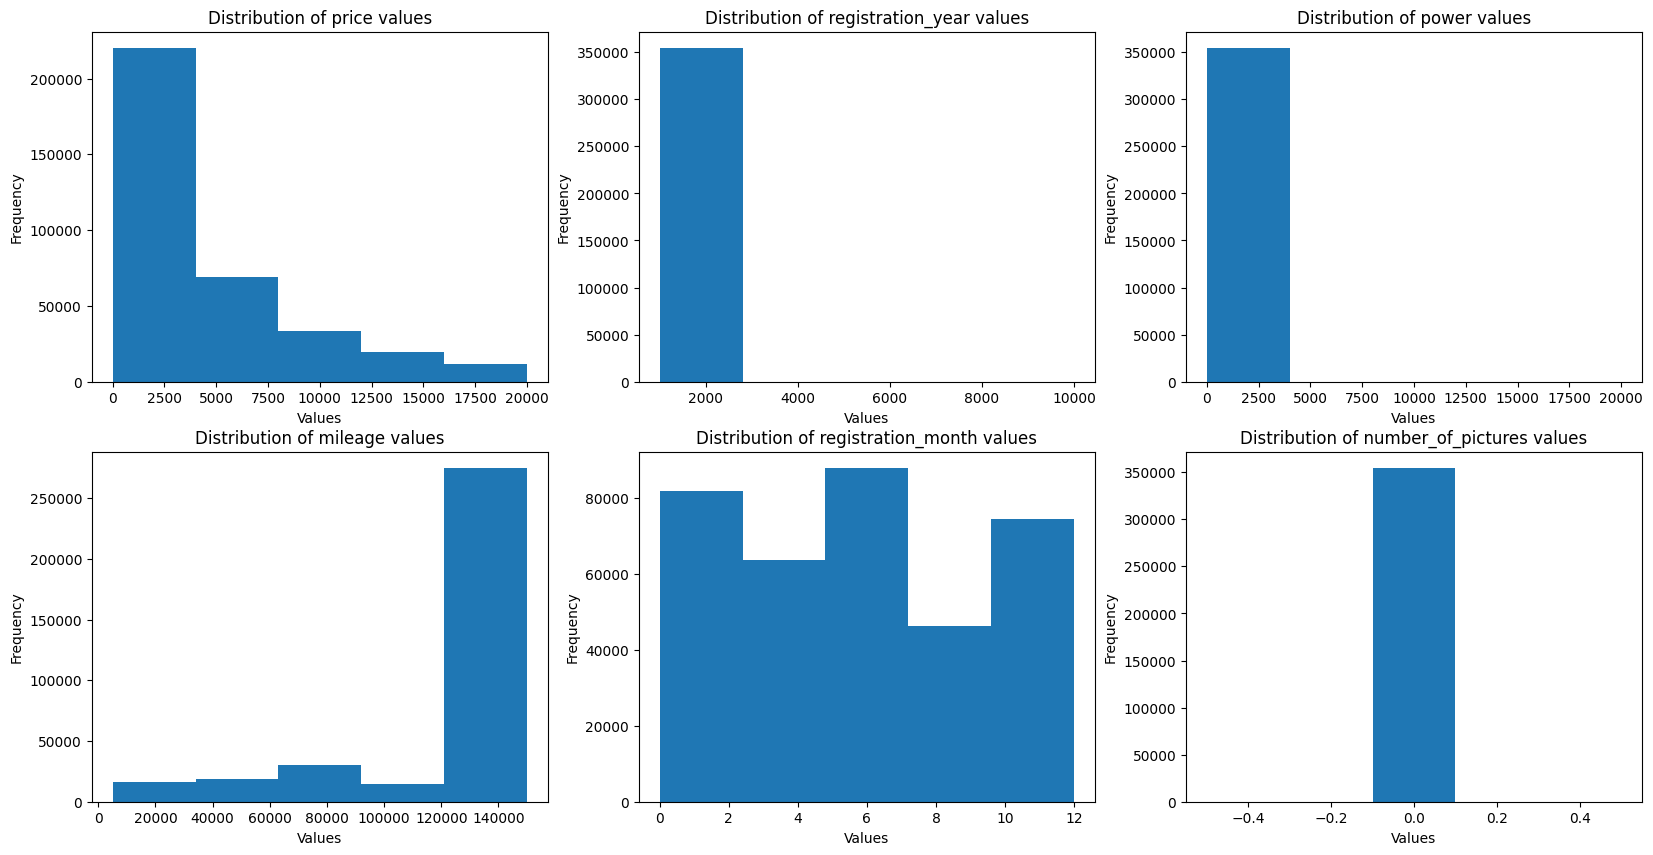

In [10]:
#Examining abnormal values in numeric columns 
num_col = ['price', 'registration_year','power','mileage','registration_month', 'number_of_pictures']
plt.figure(figsize=(20,10))
i = 1 
for col in num_col: 

    plt.subplot(2,3,i)
    plt.hist(df[col],bins=5)
    plt.title(f'Distribution of {col} values')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    i = i + 1 
plt.show()


In [11]:
#Drop row with missing values in model 
df = df.dropna(subset=['model']).reset_index(drop=True)
df.model.isna().sum()

0

In [12]:
#NaN values converted to missing obj for vehicle type & model 
df['vehicle_type'] = df['vehicle_type'].replace (np.nan, 'missing')
df['model'] = df['model'].replace(np.nan, 'missing')

In [13]:
#filtering abnormal values in registration year 
df = df[~(df['registration_year'] <= 1900)]
df = df[~(df['registration_year'] >= 2023)]
df[(df['registration_year'] <= 1900)|(df['registration_year'] >= 2023)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen


In [14]:
#Reviewing gearbox column NaN values 
df.gearbox.value_counts(dropna=False)

manual    255690
auto       62991
NaN        15629
Name: gearbox, dtype: int64

In [15]:
# Changing NaN values in gearbox column to automatic 
df.gearbox = df.gearbox.replace(np.nan, 'auto')
df.gearbox.value_counts(dropna=False)


manual    255690
auto       78620
Name: gearbox, dtype: int64

In [16]:
#Changing NaN values in not repaired column to not mentioned 
df['not_repaired']=df['not_repaired'].replace(np.nan, 'not_mentioned')
df.not_repaired.value_counts(dropna = False)


no               238614
not_mentioned     62010
yes               33686
Name: not_repaired, dtype: int64

In [17]:
#Reviewing columns in dataframe 
df.columns 

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [18]:
#Assigning fuel type based on power column 
df.fuel_type = df.fuel_type.fillna('X')
df['fuel_type'] = np.where((df['fuel_type']== 'X'), df.groupby('power')['fuel_type'].transform('max'),df['fuel_type'])
df.fuel_type = df.fuel_type.replace('X', np.nan)
df.dropna(subset=['fuel_type'],how= 'any', inplace = True)
df.fuel_type.value_counts(dropna = False)


petrol      232555
gasoline     95795
lpg           4960
cng            543
hybrid         208
other          133
electric        66
Name: fuel_type, dtype: int64

In [19]:
#changing abnormal value in power column 
df['power']=np.where((df['power']==0), df.groupby('brand')['power'].transform('mean').round(0), df['power'])
df['power']=np.where((df['power']>500), df.groupby('brand')['power'].transform('mean').round(0), df['power'])
df['power']=np.where((df['power']<50), df.groupby('brand')['power'].transform('mean').round(0), df['power'])
df.power.isna().sum()


0

In [20]:
#filtering abnormal values in price column
df = df[df['price']>100]


In [21]:
#changing columns data type to datetime 
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%d/%m/%Y %H:%M')
df['date_created'] = pd.to_datetime(df['date_created'], format='%d/%m/%Y %H:%M')
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%d/%m/%Y %H:%M')

In [22]:
#Reseting index and reviewing dataframe 
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322771 entries, 0 to 322770
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        322771 non-null  datetime64[ns]
 1   price               322771 non-null  int64         
 2   vehicle_type        322771 non-null  object        
 3   registration_year   322771 non-null  int64         
 4   gearbox             322771 non-null  object        
 5   power               322771 non-null  float64       
 6   model               322771 non-null  object        
 7   mileage             322771 non-null  int64         
 8   registration_month  322771 non-null  int64         
 9   fuel_type           322771 non-null  object        
 10  brand               322771 non-null  object        
 11  not_repaired        322771 non-null  object        
 12  date_created        322771 non-null  datetime64[ns]
 13  number_of_pictures  322771 no

Description: 
The following was done to fix the data: 
1. Droped duplicates.
2. Renamed columns for appropriate nomenclature.
3. Changed data types to appropriate data types.
4. Missing data was dropped for the model column.
5. Missing data was filled in for vehicle type and not repaired columns.
6. The data was filtered so that the car data registered from 1900 to 2023 is what is used.
7. Abnormal data that appeared in the power and fuel type columns was filled based on other columns using the groupby() method.

Data is now ready to be trained. 

## Model training

Description: The data was labeled using the LabelEncoder method because the data is categorical data. Next step, will be to prepare the features and target data to train the model. 

In [23]:
df_ordinal = df.drop(['date_crawled','date_created', 'last_seen'], axis = 1)

In [24]:
#Encoded dataset 
encoder = LabelEncoder()
df_ordinal['vehicle_type'] = encoder.fit_transform(df_ordinal ['vehicle_type'])
df_ordinal['gearbox'] = encoder.fit_transform(df_ordinal ['gearbox'])
df_ordinal['model'] = encoder.fit_transform(df_ordinal ['model'])
df_ordinal['fuel_type'] = encoder.fit_transform(df_ordinal ['fuel_type'])
df_ordinal['brand'] = encoder.fit_transform(df_ordinal ['brand'])
df_ordinal['not_repaired'] = encoder.fit_transform(df_ordinal ['not_repaired'])
display(df_ordinal)

,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,number_of_pictures,postal_code
0,480,3,1993,1,96.0,116,150000,0,6,37,1,0,70435
1,9800,7,2004,0,163.0,117,125000,8,2,14,1,0,90480
2,1500,6,2001,1,75.0,116,150000,6,6,37,0,0,91074
3,3600,6,2008,1,69.0,101,90000,7,2,31,0,0,60437
4,650,5,1995,1,102.0,11,150000,10,6,2,2,0,33775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322766,3200,5,2004,1,225.0,140,150000,5,6,30,2,0,96465
322767,1150,0,2000,1,92.0,249,150000,3,6,24,0,0,26624
322768,1199,1,2000,0,101.0,106,125000,3,6,32,0,0,26135
322769,9200,0,1996,1,102.0,224,150000,3,2,37,0,0,87439


In [25]:
#Checking for duplicates as removed unecessary columns 
df.duplicated().sum()

11

In [26]:
# Removing duplicates
df = df.drop_duplicates()

In [27]:
# defining features and target 
features = df_ordinal.drop(['price'], axis = 1)
target = df_ordinal['price']


In [28]:
#split data into 2 datasets 

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= 0.25, random_state=12345)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(242078, 12)
(80693, 12)
(242078,)
(80693,)


In [29]:
feature_names = ['vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'number_of_pictures', 'postal_code']
transformer_mas = MaxAbsScaler().fit(features_train[feature_names].to_numpy())

features_train_scaled = features_train.copy()
features_train_scaled.loc[:,feature_names] = transformer_mas.transform(features_train[feature_names].to_numpy())
features_test_scaled = features_test.copy()
features_test_scaled.loc[:,feature_names]= transformer_mas.transform(features_test[feature_names].to_numpy())

Description: The columns that will not be used in the model were dropped. The data was scaled to improve the processing speed of the model training process. The following models will be trained: Linear Regression, Random Forest, Decision Tree, XGBoost, LightGBM, and CatBoost. 

In [30]:
#Linear Regression 
model_lr = LinearRegression()

start_lr_train = time.time()
model_lr.fit (features_train_scaled, target_train)
end_lr_train = time.time()

model_lr_train_time = end_lr_train - start_lr_train

start_lr_predictions = time.time()
predictions_valid_lr = model_lr.predict(features_test_scaled)
end_lr_predictions = time.time()

model_lr_predictions_time = end_lr_predictions - start_lr_predictions 

lr_rmse = (mean_squared_error(target_test, predictions_valid_lr))**0.5 

print("Linear Regression RMSE:", lr_rmse)
print(f'Fitting time for Linear Regression = {model_lr_train_time }')
print(f'Prediction time for Linear Regression = {model_lr_predictions_time}')

Linear Regression RMSE: 2942.3682581032303
Fitting time for Linear Regression = 0.05028486251831055
Prediction time for Linear Regression = 0.013610601425170898


In [31]:
# Random Forest 
model_rf = RandomForestRegressor(random_state=12345)
rf_start_time1=time.time()
model_rf.fit(features_train_scaled, target_train) 
rf_end_time1=time.time()

model_rf_fit_time1 = rf_end_time1 - rf_start_time1

rf_start_pred_time1=time.time()
predictions_valid_rf = model_rf.predict(features_test_scaled)
rf_end_pred_time1=time.time()

model_rf_pred_time1 = rf_end_pred_time1 - rf_start_pred_time1

rf_rmse = (mean_squared_error (target_test, predictions_valid_rf))**0.5 

print("Random Forest RMSE:",rf_rmse)
print(f'Intial fit time for Random Forest = {model_rf_fit_time1}')
print(f'Intial predictions time for Random Forest = {model_rf_pred_time1}')

Random Forest RMSE: 1569.934115049923
Intial fit time for Random Forest = 85.47254610061646
Intial predictions time for Random Forest = 3.620216131210327


In [32]:
#Hyperparameter tuning for Random Forest 
param_grid = {'n_estimators':[100,150,200],
             'max_depth':[3,5,10],
             'max_features':['sqrt','log2']
}

rf = RandomForestRegressor(random_state=12345)

grid = GridSearchCV(estimator = rf,
                   param_grid = param_grid,
                   cv = 5, scoring = 'neg_root_mean_squared_error')

grid.fit(features_train_scaled, target_train)
predictions_valid = grid.predict(features_test_scaled)
rmse = (mean_squared_error(target_test, predictions_valid))**0.5 

print("The best parameters are %s with a score of %0.2f"% (grid.best_params_,grid.best_score_) )
print("Random Forest RMSE:",rmse)


The best parameters are {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200} with a score of -1933.48
Random Forest RMSE: 1925.5044374203517


In [33]:
# Training new Random Forest using tuned hyperparameters 
start_rf = time.process_time()
model_rf = RandomForestRegressor(n_estimators = 200, 
                                max_depth = 10,
                                max_features = 'sqrt',
                                random_state = 12345)
rf_start_time2=time.time()
model_rf.fit(features_train_scaled, target_train)
rf_end_time2=time.time()

model_rf_fit_time2 = rf_end_time2 - rf_start_time2

rf_start_pred_time2=time.time()
predictions_valid_rf = model_rf.predict(features_test_scaled)
rf_end_pred_time2=time.time()

model_rf_pred_time2 = rf_end_pred_time2 - rf_start_pred_time2

rf_rmse = (mean_squared_error(target_test, predictions_valid_rf))**0.5 

print("Random Forest RMSE:", rf_rmse)
print(f'Fit time for Random Forest = {model_rf_fit_time2}')
print(f'Predicition time for Random Forest = {model_rf_pred_time2}')

Random Forest RMSE: 1925.5044374203517
Fit time for Random Forest = 24.09847378730774
Predicition time for Random Forest = 1.1067893505096436


In [34]:
# Decision Tree 
start_fit_time_dt = time.time()
model_dt = DecisionTreeRegressor(random_state = 12345)
model_dt.fit(features_train_scaled, target_train)
end_fit_time_dt = time.time()

model_dt_fit_time = end_fit_time_dt - start_fit_time_dt

dt_start_pred_time = time.time()
predictions_valid_dt = model_dt.predict(features_test_scaled)
dt_end_pred_time = time.time()

model_dt_pred_time = dt_end_pred_time - dt_start_pred_time

dt_rmse = (mean_squared_error(target_test, predictions_valid_dt))** 0.5 

print("Decision Tree RMSE:", dt_rmse)
print(f'Fit time for Decision Tree = {model_dt_fit_time}')
print(f'Prediction time for Decision Tree = {model_dt_pred_time}')

Decision Tree RMSE: 2153.170435446976
Fit time for Decision Tree = 1.3078618049621582
Prediction time for Decision Tree = 0.044676780700683594


Description: 
Linear Regression produced the following results:
Linear Regression RMSE: 2942.3682581032303
Fitting time for Linear Regression = 0.05028486251831055
Prediction time for Linear Regression = 0.013610601425170898

These results can serve as a dummy model to perform a sanity check on the other models. 

Random Forest produced the following results:
No tuning: 
Random Forest RMSE: 1569.934115049923
Intial fit time for Random Forest = 85.47254610061646
Intial predictions time for Random Forest = 3.620216131210327

After tuning: 
Random Forest RMSE: 1925.5044374203517
Fit time for Random Forest = 24.09847378730774
Predicition time for Random Forest = 1.1067893505096436

Decision Tree produced the following results:
Decision Tree RMSE: 2153.170435446976
Fit time for Decision Tree = 1.3078618049621582
Prediction time for Decision Tree = 0.044676780700683594

These results illustrate the following: 
1. Linear regression had the fastest times, but had the highest RMSE.
2. Random forest had a better RMSE prior to tuning hyperparameters, but faster times after tuning hyperparameters.
3. Decision tree had a RMSE that was higher then Linear regression and was faster than the Random forest model. 

Next steps, will be to examine the following models XGBoost, LightGBM, and Catboost. Then compare all the results to determine the most accurate results using RMSE and determine what models have the best speeds. 

In [35]:
#XGBoost 
model_xgb = XGBRegressor(random_state = 12345)
start_xgb_fit = time.time()
model_xgb.fit(features_train_scaled,target_train)
end_xgb_fit = time.time()
xgb_fit_time = end_xgb_fit - start_xgb_fit

start_xgb_pred = time.time()
predictions_valid_xgb = model_xgb.predict(features_test_scaled)
end_xgb_pred = time.time()
xgb_pred_time = end_xgb_pred - start_xgb_pred

xgb_rmse= (mean_squared_error(target_test, predictions_valid_xgb))** 0.5 
print("XGBoost RMSE:", xgb_rmse)
print(f'Intitial fit time for XGBoost = {xgb_fit_time}')
print(f'Intitial prediction time for XGBoost = {xgb_pred_time}')

XGBoost RMSE: 1627.7543455808639
Intitial fit time for XGBoost = 25.224154949188232
Intitial prediction time for XGBoost = 0.07543659210205078


In [36]:
#Training new XGBoost  using tuned hyperparameters 
model_xgb = XGBRegressor (n_estimators = 300,
                         max_depth = 10, 
                         learning_rate = 0.1,
                         random_state = 12345)
xgb_time_params_fit_start = time.time()
model_xgb.fit(features_train_scaled,target_train)
xgb_time_params_fit_end = time.time()
xgb_time_params_fit = xgb_time_params_fit_end - xgb_time_params_fit_start

xgb_time_params_pred_start = time.time()
predictions_valid_xgb = model_xgb.predict(features_test_scaled)
xgb_time_params_pred_end = time.time()

xgb_time_params_pred = xgb_time_params_pred_end - xgb_time_params_pred_start

xgb_rmse = (mean_squared_error(target_test, predictions_valid_xgb))** 0.5 

print("XGBoost RMSE:", xgb_rmse)
print(f'Fit time for XGBoost with hyperparameters = {xgb_time_params_fit}')
print(f'Prediction time for XGBoost with hyperparameters = {xgb_time_params_pred}')

XGBoost RMSE: 1516.4285798633603
Fit time for XGBoost with hyperparameters = 142.27277779579163
Prediction time for XGBoost with hyperparameters = 0.544062614440918


In [37]:
#LightGBM
model_lgbm = LGBMRegressor(random_state = 12345)

start_lgbm_fit = time.time()
model_lgbm.fit(features_train_scaled, target_train)
end_lgbm_fit = time.time()
lgbm_time_fit = end_lgbm_fit - start_lgbm_fit

start_lgbm_pred = time.time()
predictions_valid_lgbm = model_lgbm.predict(features_test_scaled)
end_lgbm_pred = time.time()

lgbm_time_pred = end_lgbm_pred - start_lgbm_pred

lgbm_rmse = (mean_squared_error(target_test, predictions_valid_lgbm))** 0.5 

print("LightGBM RMSE:",lgbm_rmse)
print(f'Intitial fit time for LightGBM = {lgbm_time_fit}')
print(f'Intitial prediction time for LightGBM = {lgbm_time_pred}')

LightGBM RMSE: 1714.0351540555143
Intitial fit time for LightGBM = 2.172140121459961
Intitial prediction time for LightGBM = 0.30919313430786133


In [38]:
#LightGBM hyperparameter tuning 
param_grid = {'n_estimators': [100,200,300],
              'max_depth': [3,5,10],
              'learning_rate': [0.1, 0.01]    
}

lgbm = LGBMRegressor(random_state = 12345)

grid = GridSearchCV(estimator = lgbm,
                   param_grid = param_grid, 
                   cv = 5, scoring = 'neg_root_mean_squared_error')

grid.fit(features_train_scaled, target_train)
predictions_valid = grid.predict(features_test_scaled)
rmse = (mean_squared_error(target_test, predictions_valid))** 0.5 

print("The best parameters are %s with a score of %0.2f"%(grid.best_params_,grid.best_score_))
print ("LightGBM RMSE:",rmse)


The best parameters are {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300} with a score of -1636.73
LightGBM RMSE: 1625.6025373804491


In [39]:
#Training new LightGBM model using tuned hyperparameters 
model_lgbm = LGBMRegressor(n_estimators = 300, 
                          max_depth = 10,
                          learning_rate =0.1,
                          random_state = 12345)
start_lgbm_params_fit = time.time()
model_lgbm.fit(features_train_scaled, target_train)
end_lgbm_params_fit = time.time()

lgbm_params_fit = end_lgbm_params_fit - start_lgbm_params_fit

start_lgbm_params_pred = time.time()
predictions_valid_lgbm = model_lgbm.predict(features_test_scaled)
end_lgbm_params_pred = time.time()

lgbm_params_pred = end_lgbm_params_pred - start_lgbm_params_pred

lgbm_rmse = (mean_squared_error(target_test, predictions_valid_lgbm))** 0.5 

print("LightGBM RMSE:",lgbm_rmse)
print(f'Fit time for LightGBM = {lgbm_params_fit}')
print(f'Prediction time for LightGBM = {lgbm_params_pred}')

LightGBM RMSE: 1625.6025373804491
Fit time for LightGBM = 5.08963418006897
Prediction time for LightGBM = 0.7068135738372803


In [40]:
#CatBoost 

model_cat = CatBoostRegressor(random_state = 12345)

start_cat_fit = time.time()
model_cat.fit(features_train_scaled, target_train, verbose = 100)
end_cat_fit = time.time()

cat_time_fit = end_cat_fit - start_cat_fit

start_cat_pred = time.time()
predictions_valid_cat = model_cat.predict(features_test_scaled)
end_cat_pred = time.time()

cat_time_pred = end_cat_pred - start_cat_pred

cat_rmse = (mean_squared_error(target_test, predictions_valid_cat))** 0.5

print("CatBoost RSME:", cat_rmse)
print(f'Intitial fit time for CatBoost = {cat_time_fit}')
print(f'Intitial prediction time for CatBoost = {cat_time_pred}')

Learning rate set to 0.097464
0:	learn: 4248.4107997	total: 62.9ms	remaining: 1m 2s
100:	learn: 1833.7289999	total: 1.46s	remaining: 13s
200:	learn: 1738.0595021	total: 2.82s	remaining: 11.2s
300:	learn: 1688.5163261	total: 4.18s	remaining: 9.71s
400:	learn: 1653.8092934	total: 5.57s	remaining: 8.32s
500:	learn: 1627.3673013	total: 6.95s	remaining: 6.92s
600:	learn: 1606.6950782	total: 8.37s	remaining: 5.55s
700:	learn: 1589.5243180	total: 9.73s	remaining: 4.15s
800:	learn: 1574.3440654	total: 11.1s	remaining: 2.76s
900:	learn: 1560.1895105	total: 12.5s	remaining: 1.38s
999:	learn: 1548.3070387	total: 13.9s	remaining: 0us
CatBoost RSME: 1613.5333309376813
Intitial fit time for CatBoost = 14.245149612426758
Intitial prediction time for CatBoost = 0.03509378433227539


In [41]:
#CatBoost hyperparameter tuning 
param_grid = {'iterations': [100,150,200],
             'depth':[3,5,10],
             'learning_rate':[0.1, 0.01]
}

cat = CatBoostRegressor(random_state = 12345)

grid = GridSearchCV(estimator = cat, 
                   param_grid = param_grid, 
                   cv = 5, scoring ='neg_root_mean_squared_error')
grid.fit(features_train_scaled, target_train, verbose = 50)
predictions_valid = grid.predict(features_test_scaled)
rmse = (mean_squared_error(target_test, predictions_valid))** 0.5

print("The best parameters are %s with a score of %0.2f"%(grid.best_params_, grid.best_score_))
print("CatBoose RMSE:", rmse)


0:	learn: 4298.3568644	total: 10.8ms	remaining: 1.06s
50:	learn: 2189.7695369	total: 440ms	remaining: 423ms
99:	learn: 2036.7798413	total: 848ms	remaining: 0us
0:	learn: 4298.7306575	total: 10.3ms	remaining: 1.02s
50:	learn: 2190.6469640	total: 444ms	remaining: 426ms
99:	learn: 2033.8532021	total: 857ms	remaining: 0us
0:	learn: 4296.0206678	total: 9.7ms	remaining: 960ms
50:	learn: 2192.4910772	total: 445ms	remaining: 427ms
99:	learn: 2036.0716394	total: 848ms	remaining: 0us
0:	learn: 4302.5729597	total: 9ms	remaining: 891ms
50:	learn: 2193.2474468	total: 430ms	remaining: 414ms
99:	learn: 2039.3060600	total: 874ms	remaining: 0us
0:	learn: 4299.1547248	total: 8.96ms	remaining: 887ms
50:	learn: 2203.5150518	total: 429ms	remaining: 413ms
99:	learn: 2044.7048171	total: 822ms	remaining: 0us
0:	learn: 4508.6712808	total: 9.07ms	remaining: 898ms
50:	learn: 3614.7162843	total: 446ms	remaining: 428ms
99:	learn: 3112.1637228	total: 866ms	remaining: 0us
0:	learn: 4511.1850457	total: 8.63ms	remaini

In [42]:
#Training new CatBoost model using tuned hyperparameters 
model_cat = CatBoostRegressor(iterations = 200,
                             depth = 10, 
                             learning_rate =0.1,
                             random_state = 12345)

start_cat_params_fit = time.time()
model_cat.fit(features_train_scaled, target_train, verbose = 100)
end_cat_params_fit = time.time()

cat_params_fit = end_cat_params_fit - start_cat_params_fit

start_cat_params_pred =time.time()
predictions_valid_cat = model_cat.predict(features_test_scaled)
end_cat_params_pred =time.time()

cat_params_pred = end_cat_params_pred - start_cat_params_pred

cat_rmse = (mean_squared_error(target_test, predictions_valid_cat))** 0.5

print("CatBoost RMSE:",cat_rmse)
print(f'Fit time for CatBoost = {cat_params_fit}')
print(f'Prediction time for CatBoost = {cat_params_pred}')

0:	learn: 4215.4502404	total: 32.1ms	remaining: 6.4s
100:	learn: 1685.1834209	total: 3.03s	remaining: 2.97s
199:	learn: 1585.5321706	total: 5.98s	remaining: 0us
CatBoost RMSE: 1637.311392402146
Fit time for CatBoost = 6.1852638721466064
Prediction time for CatBoost = 0.023926258087158203


Description: 
XGBoost produced the following results:
No tuning: 
XGBoost RMSE: 1627.7543455808639
Intitial fit time for XGBoost = 25.224154949188232
Intitial prediction time for XGBoost = 0.07543659210205078

After tuning: 
XGBoost RMSE: 1516.4285798633603
Fit time for XGBoost with hyperparameters = 142.27277779579163
Prediction time for XGBoost with hyperparameters = 0.544062614440918

LightGBM produced the following results:
No tuning: 
LightGBM RMSE: 1714.0351540555143
Intitial fit time for LightGBM = 2.172140121459961
Intitial prediction time for LightGBM = 0.30919313430786133

After tuning:
LightGBM RMSE: 1625.6025373804491
Fit time for LightGBM = 5.08963418006897
Prediction time for LightGBM = 0.7068135738372803

CatBoost produced the following results:
No tuning: 
CatBoost RSME: 1613.5333309376813
Intitial fit time for CatBoost = 14.245149612426758
Intitial prediction time for CatBoost = 0.03509378433227539

After tuning:
CatBoost RMSE: 1637.311392402146
Fit time for CatBoost = 6.1852638721466064
Prediction time for CatBoost = 0.023926258087158203

These results illustrate the following:  
1. XGBoost RMSE results improved after fine tuning the hyperparameters, however the speed decreased signficantly.
2. LightGBM overall performance improved after fine tuning the hyperparameters. The RMSE score was better and the speed decreased slightly.
3. CatBoost experienced a slight decrease in performance for the accuracy of the model's prediction abilities, but a signficant improvement in it's speed is seen. 

Next steps, will be to examine the 6 models based on training/predictive speed and predictive accuracy by creating a visual representation to determine the best models. 

## Model analysis

In [45]:
#Info 
models_examined = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LGBM', 'CatBoost']
models_rmse = [lr_rmse, dt_rmse, rf_rmse, xgb_rmse, lgbm_rmse, cat_rmse]
train_time_models = [model_lr_train_time,model_dt_fit_time,model_rf_fit_time2,xgb_time_params_fit,lgbm_params_fit,cat_params_fit]
pred_time_models = [model_lr_predictions_time,model_dt_pred_time,model_rf_pred_time2,xgb_time_params_pred,lgbm_params_pred,cat_params_pred]


#Dataframe creation 
comparison = pd.DataFrame(
    {'Models': models_examined,
     'Model RMSE':models_rmse, 
     'Train time':train_time_models,
     'Prediction time':pred_time_models
})
  
display (comparison)


,Models,Model RMSE,Train time,Prediction time
0,Linear Regression,2942.368258,0.050285,0.013611
1,Decision Tree,2153.170435,1.307862,0.044677
2,Random Forest,1925.504437,24.098474,1.106789
3,XGBoost,1516.428580,142.272778,0.544063
4,LGBM,1625.602537,5.089634,0.706814
5,CatBoost,1637.311392,6.185264,0.023926


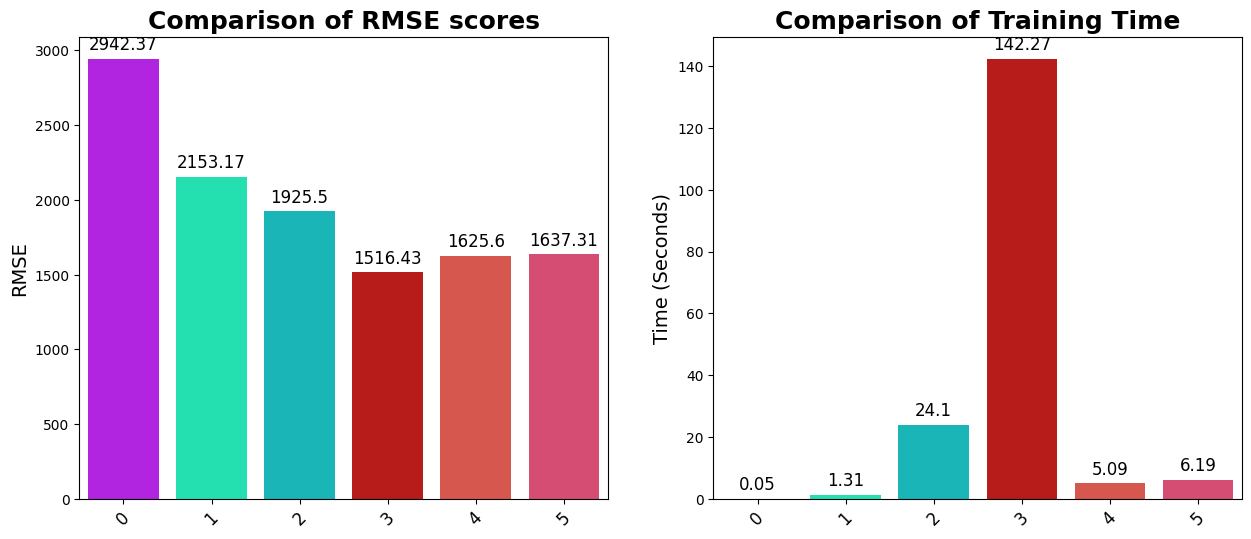

In [54]:
#Devising a visual 

#Setting colors 
colors = ['#C106FF', '#05FFC1', '#00CED1', '#D10200', '#ED4336', '#ED366A']
sns.set_palette(sns.color_palette(colors))

#Figure size 
fig = plt.figure (figsize=(15,6))

#Creating bar plot for RMSE scores
ax1=fig.add_subplot(1,2,1)
sns.barplot(x=comparison.index, y='Model RMSE', data=comparison, ax=ax1)

#Set the title and y axis label
ax1.set_title('Comparison of RMSE scores',fontsize = 18, fontweight= 'bold')
ax1.set_ylabel('RMSE',fontsize = 14)

#Rotate the x axis labels
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, fontsize=12)

#Add value labels to the bars 
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width()/ 2, p.get_height()),
                                               ha='center', va ='center', xytext=(0, 10), textcoords ='offset points', fontsize =12)

#Creating bar plot for training times 
ax2 =fig.add_subplot(1,2,2)
sns.barplot(x=comparison.index, y ='Train time', data = comparison, ax=ax2)

#Title and y-axis label 
ax2.set_title('Comparison of Training Time', fontsize=18, fontweight='bold')
ax2.set_ylabel('Time (Seconds)',fontsize=14)

#Rotate the x-axis labels for better readability 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=12)

#Add value labels to the bars 
for p in ax2.patches: 
    ax2.annotate(str(round(p.get_height(),2)),(p.get_x() + p.get_width()/2, p.get_height()),
                            ha ='center', va='center', xytext=(0,10), textcoords='offset points', fontsize=12)

#Show the plot 
plt.show()

Description: In examining the various models using the visualization it becomes apparent that the use of gradient boost methods greatly increases the predictive accuracy of the models. The model with the best predictions is XGBoost, however it requires the longest training time compared ot the other models. If examining the models based on overall performance (speed and accuracy) then the most successful model would be LightGBM due to its speed and accuracy. 

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>

    
    
- After we train all models, it is recommended that we choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, we have to consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.

</div>

Conclusion: It is recommended that Rusty Bargain use a gradient boosting model such as XGBoost, LightGBM, or CatBoost to devise their car price prediction model. It will be paramount to consider the training time and prediction time of the model as this will greatly impact user expereince. User's will prefer a model that is both accurate and provides fast results. Therefore, it is suggested that LightGBM or CatBoost be used to promote a better user experience that will be both accurate and responsive.   